In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates


[datetime.datetime(2024, 9, 20, 14, 35, 44, 323000), datetime.datetime(2024, 9, 20, 14, 35, 44, 398000), datetime.datetime(2024, 9, 20, 14, 35, 44, 417000), datetime.datetime(2024, 9, 20, 14, 35, 44, 436000), datetime.datetime(2024, 9, 20, 14, 35, 44, 454000), datetime.datetime(2024, 9, 20, 14, 35, 44, 473000), datetime.datetime(2024, 9, 20, 14, 35, 44, 492000), datetime.datetime(2024, 9, 20, 14, 35, 44, 511000), datetime.datetime(2024, 9, 20, 14, 35, 44, 529000), datetime.datetime(2024, 9, 20, 14, 35, 44, 548000), datetime.datetime(2024, 9, 20, 14, 35, 44, 567000), datetime.datetime(2024, 9, 20, 14, 35, 44, 586000), datetime.datetime(2024, 9, 20, 14, 35, 44, 604000), datetime.datetime(2024, 9, 20, 14, 35, 44, 623000), datetime.datetime(2024, 9, 20, 14, 35, 44, 642000), datetime.datetime(2024, 9, 20, 14, 35, 44, 661000), datetime.datetime(2024, 9, 20, 14, 35, 44, 679000), datetime.datetime(2024, 9, 20, 14, 35, 44, 698000), datetime.datetime(2024, 9, 20, 14, 35, 44, 717000), datetime.da

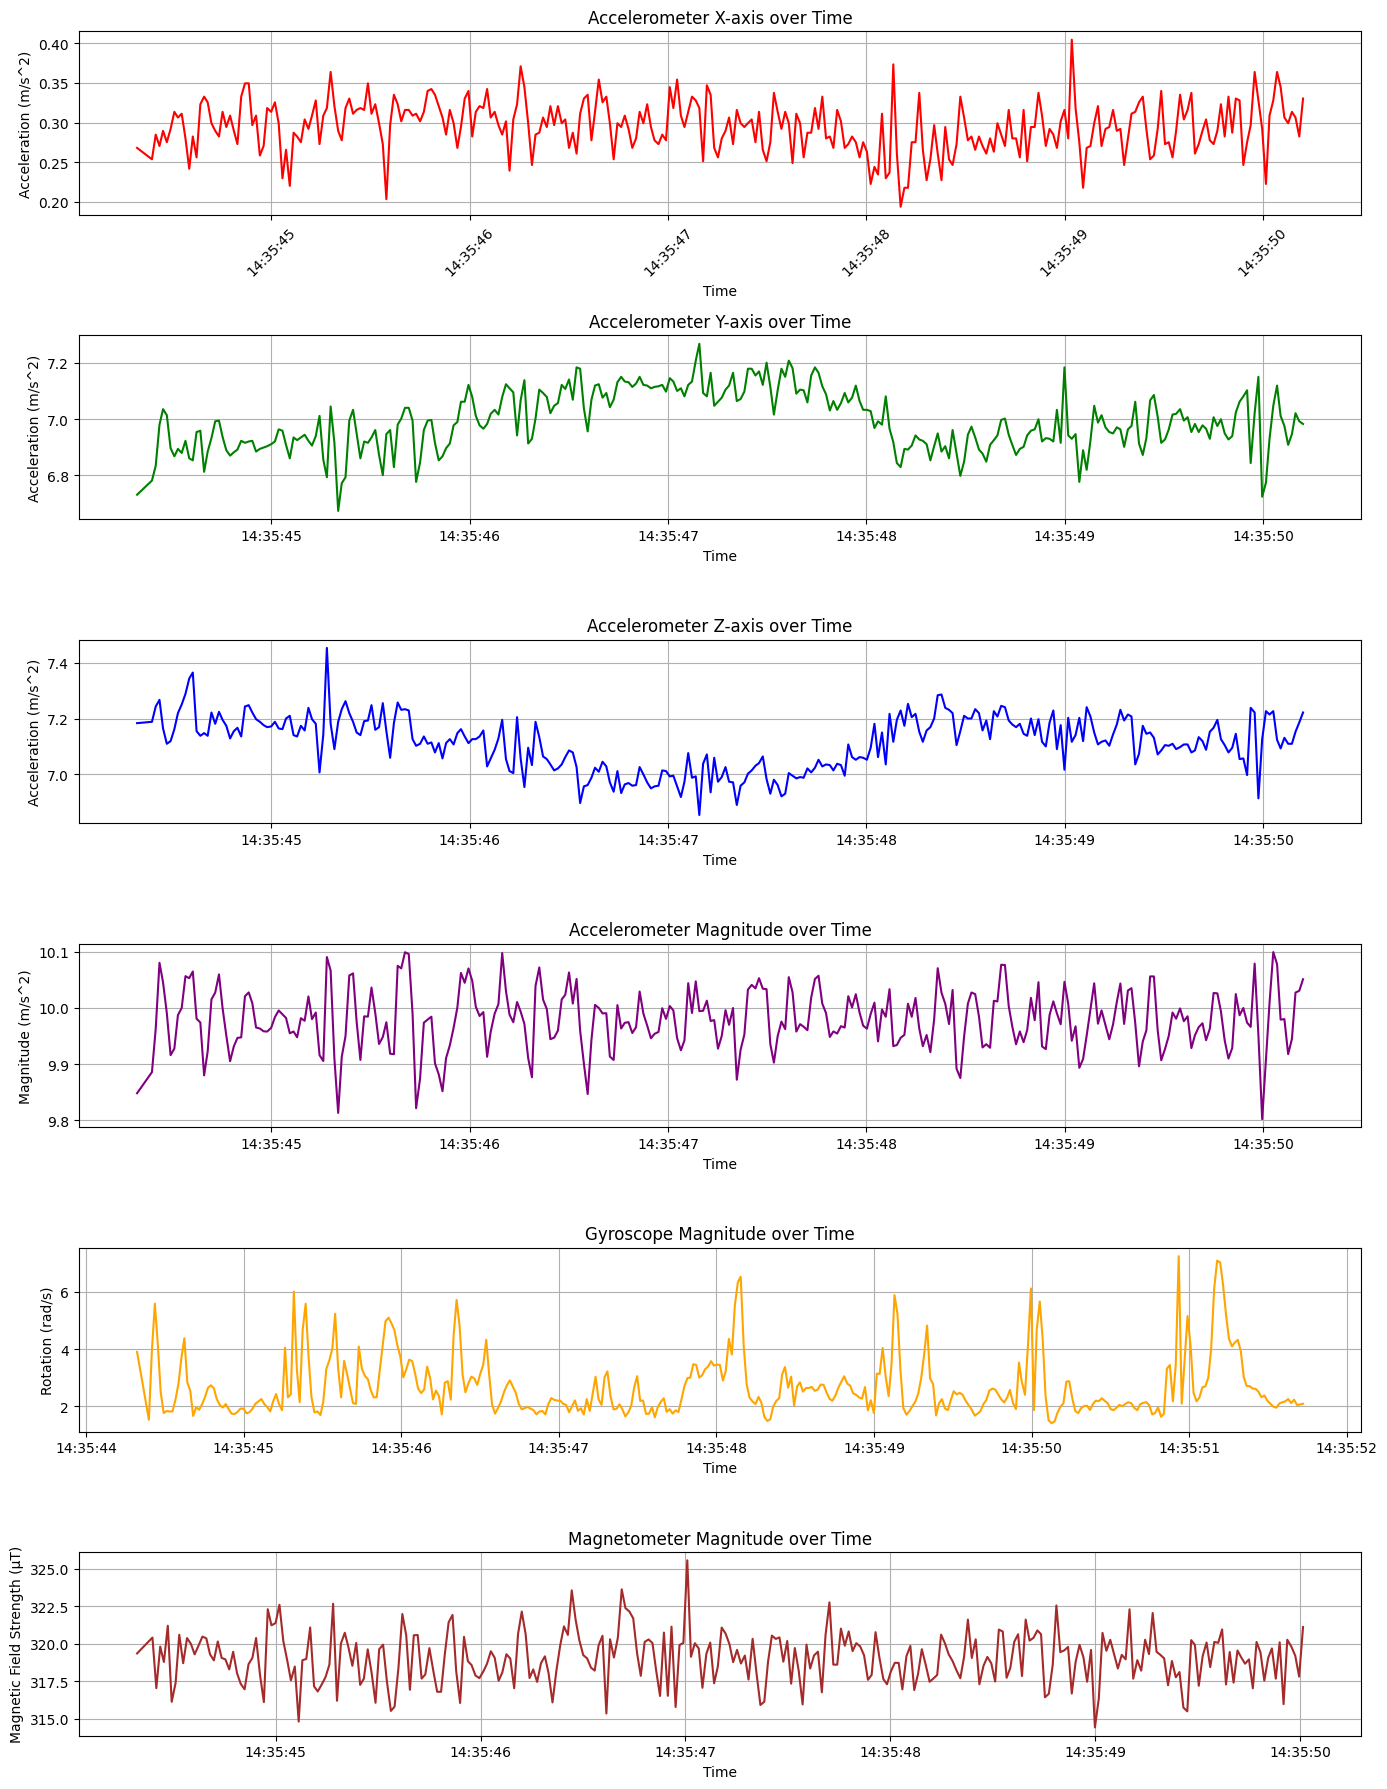

In [10]:
df_acc = pd.read_csv('Data/ACC_2024_09_20_14_35.csv')
df_gyro = pd.read_csv('Data/GYRO_2024_09_20_14_35.csv')
df_mag = pd.read_csv('Data/MAGN_2024_09_20_14_35.csv')


# Extract the timestamp and sensor data columns
timestamps_acc = df_acc['timestamp'].values
timestamps_gyro = df_gyro['timestamp'].values
timestamps_mag = df_mag['timestamp'].values

# Accelerometer data
acc_x = df_acc['x'].values
acc_y = df_acc['y'].values
acc_z = df_acc['z'].values

# Gyroscope data
gyro_x = df_gyro['x'].values
gyro_y = df_gyro['y'].values
gyro_z = df_gyro['z'].values

# Magnetometer data
mag_x = df_mag['x'].values
mag_y = df_mag['y'].values
mag_z = df_mag['z'].values

# Convert Unix timestamp (milliseconds) to datetime objects
timestamps_datetime_acc = [datetime.datetime.fromtimestamp(ts / 1000) for ts in timestamps_acc]
timestamps_datetime_gyro = [datetime.datetime.fromtimestamp(ts / 1000) for ts in timestamps_gyro]
timestamps_datetime_mag = [datetime.datetime.fromtimestamp(ts / 1000) for ts in timestamps_mag]

print(timestamps_datetime_acc)
# Step 2: Compute the magnitude for each sensor
# Magnitude for accelerometer
acc_magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)

# Magnitude for gyroscope
gyro_magnitude = np.sqrt(gyro_x**2 + gyro_y**2 + gyro_z**2)

# Magnitude for magnetometer
mag_magnitude = np.sqrt(mag_x**2 + mag_y**2 + mag_z**2)

# Step 3: Visualization
plt.figure(figsize=(14, 18))

# Accelerometer plots (X, Y, Z, and Magnitude)
plt.subplot(6, 1, 1)
plt.plot(timestamps_datetime_acc, acc_x, label="Accelerometer X", color='red')
plt.title('Accelerometer X-axis over Time')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Format x-axis as HH:MM:SS
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.subplot(6, 1, 2)
plt.plot(timestamps_datetime_acc, acc_y, label="Accelerometer Y", color='green')
plt.title('Accelerometer Y-axis over Time')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.grid(True)

plt.subplot(6, 1, 3)
plt.plot(timestamps_datetime_acc, acc_z, label="Accelerometer Z", color='blue')
plt.title('Accelerometer Z-axis over Time')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.grid(True)

plt.subplot(6, 1, 4)
plt.plot(timestamps_datetime_acc, acc_magnitude, label="Accelerometer Magnitude", color='purple')
plt.title('Accelerometer Magnitude over Time')
plt.xlabel('Time')
plt.ylabel('Magnitude (m/s^2)')
plt.grid(True)

# Gyroscope plots (Magnitude)
plt.subplot(6, 1, 5)
plt.plot(timestamps_datetime_gyro, gyro_magnitude, label="Gyroscope Magnitude", color='orange')
plt.title('Gyroscope Magnitude over Time')
plt.xlabel('Time')
plt.ylabel('Rotation (rad/s)')
plt.grid(True)

# Magnetometer plots (Magnitude)
plt.subplot(6, 1, 6)
plt.plot(timestamps_datetime_mag, mag_magnitude, label="Magnetometer Magnitude", color='brown')
plt.title('Magnetometer Magnitude over Time')
plt.xlabel('Time')
plt.ylabel('Magnetic Field Strength (µT)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  311 non-null    int64  
 1   x          311 non-null    float64
 2   y          311 non-null    float64
 3   z          311 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.8 KB


In [12]:
start_time = datetime.datetime.fromtimestamp(df_acc['timestamp'].iloc[0] / 1000)
end_time = datetime.datetime.fromtimestamp(df_acc['timestamp'].iloc[-1] / 1000)
print("Start time:", start_time)
print("End time:", end_time)


Start time: 2024-09-20 14:35:44.323000
End time: 2024-09-20 14:35:50.202000


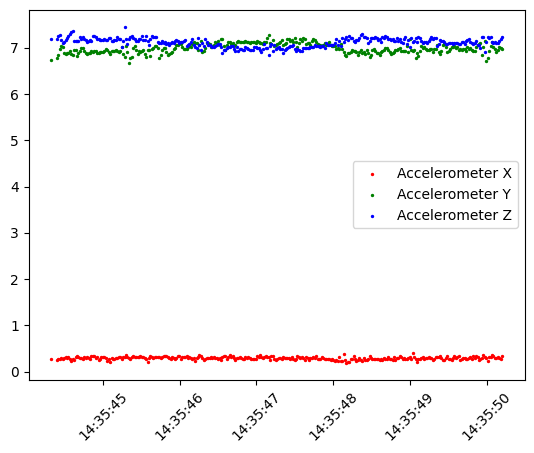

In [13]:
plt.scatter(timestamps_datetime_acc, acc_x, label='Accelerometer X', color='red', s=2)
plt.scatter(timestamps_datetime_acc, acc_y, label='Accelerometer Y', color='green', s=2)
plt.scatter(timestamps_datetime_acc, acc_z, label='Accelerometer Z', color='blue', s=2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [14]:
timestamp_diffs = np.diff(timestamps_acc)
print("Timestamp intervals (ms):", timestamp_diffs)


Timestamp intervals (ms): [75 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18
 19 19 19 18 19 19 19 18 20 19 19 19 18 19 19 18 19 19 19 18 19 19 19 18
 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18
 20 19 19 19 18 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 20 19 19 19
 18 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18
 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 20 19 19 19 18 19 19 18
 19 19 19 18 19 19 19 18 19 19 19 18 20 19 19 19 18 19 19 18 19 19 19 18
 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18
 19 19 19 18 20 19 19 19 18 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18
 20 19 19 19 18 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18
 19 19 19 18 19 19 19 18 19 19 19 18 19 19 19 18 20 19 19 19 18 19 19 18
 19 19 19 18 19 19 19 18 19 19 19 18 20 19 19 19 18 19 19 18 19 19 19 18
 19 19 19 18 19 19 19 18 20 19 19 19 18 19 19 18 19 19 19 18 19 19]
